In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import lightgbm
from sklearn.model_selection import train_test_split
import sys, os

sys.path.append('../src')
from aux_fun import *

In [2]:
plt.style.use('dark_background')

In [3]:
%run -t ../src/predict_f3JXY.py

Using TensorFlow backend.
/home/sergio/TR_GPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sergio/TR_GPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sergio/TR_GPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sergio/TR_GPU/lib/python3.6/site-packages/tensorflow/python

Cargando: ../data/structures.csv ... OK!
Armando struct_dict OK!
Cargando: ../data/train.csv ... OK!
 [*] reading spatial descriptors... 
     [+] columns:  Index(['Unnamed: 0', 'molecule_name', 'atom_index', 'atom', 'desc_g2ang_00',
       'desc_g2ang_01', 'desc_g2ang_02', 'desc_g2ang_03', 'desc_g2ang_04',
       'desc_g2ang_05', 'desc_g2ang_06', 'desc_g2ang_07', 'desc_g2ang_08',
       'desc_g2ang_09', 'desc_g2ang_10', 'desc_g2ang_11', 'desc_g2ang_12',
       'desc_g2ang_13', 'desc_g2ang_14', 'desc_g2ang_15', 'desc_g2ang_16',
       'desc_g2ang_17', 'desc_g2ang_18', 'desc_g2ang_19', 'desc_g2rad_00',
       'desc_g2rad_01', 'desc_g2rad_02', 'desc_g2rad_03', 'desc_g2rad_04',
       'desc_g2rad_05', 'desc_g2rad_06', 'desc_g2rad_07', 'desc_g2rad_08',
       'desc_g2rad_09'],
      dtype='object')
 [*] reading Mulliken charges... 


/media/sergio/EVO970/Kaggle/molecules/kaggle_molecules/src/funcs_train.py:268: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  fnan = (~df_merge["mulliken_charge"].isna()).nonzero()[0].size / df_merge.shape[0]


fraccion de filas con NaNs como resultado "bruto" del merge:  0.6501601670010192

 [*] normalize the spatial descriptors (and Mulliken charges) and *align* them with train data...
 [*] processing in parallel... 
   > [proc::ForkPoolWorker-1] 1/582268


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


   > [proc::ForkPoolWorker-2] 1/582268


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


   > [proc::ForkPoolWorker-3] 1/582268


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


   > [proc::ForkPoolWorker-4] 1/582268


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


   > [proc::ForkPoolWorker-5] 1/582268


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


   > [proc::ForkPoolWorker-1] 5001/582268
   > [proc::ForkPoolWorker-6] 1/582269


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


   > [proc::ForkPoolWorker-7] 1/582269


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


   > [proc::ForkPoolWorker-2] 5001/582268
   > [proc::ForkPoolWorker-8] 1/582269


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


   > [proc::ForkPoolWorker-3] 5001/582268
   > [proc::ForkPoolWorker-4] 5001/582268
   > [proc::ForkPoolWorker-5] 5001/582268
   > [proc::ForkPoolWorker-1] 10001/582268
   > [proc::ForkPoolWorker-6] 5001/582269
   > [proc::ForkPoolWorker-7] 5001/582269
   > [proc::ForkPoolWorker-2] 10001/582268
   > [proc::ForkPoolWorker-8] 5001/582269
   > [proc::ForkPoolWorker-3] 10001/582268
   > [proc::ForkPoolWorker-4] 10001/582268
   > [proc::ForkPoolWorker-5] 10001/582268
   > [proc::ForkPoolWorker-6] 10001/582269
   > [proc::ForkPoolWorker-1] 15001/582268
   > [proc::ForkPoolWorker-7] 10001/582269
   > [proc::ForkPoolWorker-2] 15001/582268
   > [proc::ForkPoolWorker-8] 10001/582269
   > [proc::ForkPoolWorker-3] 15001/582268
   > [proc::ForkPoolWorker-4] 15001/582268
   > [proc::ForkPoolWorker-5] 15001/582268
   > [proc::ForkPoolWorker-6] 15001/582269
   > [proc::ForkPoolWorker-1] 20001/582268
   > [proc::ForkPoolWorker-7] 15001/582269
   > [proc::ForkPoolWorker-2] 20001/582268
   > [proc::ForkP

   > [proc::ForkPoolWorker-8] 120001/582269
   > [proc::ForkPoolWorker-4] 125001/582268
   > [proc::ForkPoolWorker-2] 125001/582268
   > [proc::ForkPoolWorker-5] 125001/582268
   > [proc::ForkPoolWorker-7] 125001/582269
   > [proc::ForkPoolWorker-6] 125001/582269
   > [proc::ForkPoolWorker-3] 130001/582268
   > [proc::ForkPoolWorker-1] 125001/582268
   > [proc::ForkPoolWorker-8] 125001/582269
   > [proc::ForkPoolWorker-4] 130001/582268
   > [proc::ForkPoolWorker-2] 130001/582268
   > [proc::ForkPoolWorker-5] 130001/582268
   > [proc::ForkPoolWorker-7] 130001/582269
   > [proc::ForkPoolWorker-6] 130001/582269
   > [proc::ForkPoolWorker-3] 135001/582268
   > [proc::ForkPoolWorker-1] 130001/582268
   > [proc::ForkPoolWorker-8] 130001/582269
   > [proc::ForkPoolWorker-4] 135001/582268
   > [proc::ForkPoolWorker-2] 135001/582268
   > [proc::ForkPoolWorker-5] 135001/582268
   > [proc::ForkPoolWorker-7] 135001/582269
   > [proc::ForkPoolWorker-6] 135001/582269
   > [proc::ForkPoolWorker-3] 14

   > [proc::ForkPoolWorker-7] 240001/582269
   > [proc::ForkPoolWorker-2] 240001/582268
   > [proc::ForkPoolWorker-1] 235001/582268
   > [proc::ForkPoolWorker-8] 240001/582269
   > [proc::ForkPoolWorker-5] 245001/582268
   > [proc::ForkPoolWorker-3] 245001/582268
   > [proc::ForkPoolWorker-4] 245001/582268
   > [proc::ForkPoolWorker-6] 245001/582269
   > [proc::ForkPoolWorker-7] 245001/582269
   > [proc::ForkPoolWorker-2] 245001/582268
   > [proc::ForkPoolWorker-1] 240001/582268
   > [proc::ForkPoolWorker-8] 245001/582269
   > [proc::ForkPoolWorker-5] 250001/582268
   > [proc::ForkPoolWorker-3] 250001/582268
   > [proc::ForkPoolWorker-4] 250001/582268
   > [proc::ForkPoolWorker-6] 250001/582269
   > [proc::ForkPoolWorker-7] 250001/582269
   > [proc::ForkPoolWorker-2] 250001/582268
   > [proc::ForkPoolWorker-1] 245001/582268
   > [proc::ForkPoolWorker-5] 255001/582268
   > [proc::ForkPoolWorker-3] 255001/582268
   > [proc::ForkPoolWorker-8] 250001/582269
   > [proc::ForkPoolWorker-4] 25

   > [proc::ForkPoolWorker-6] 360001/582269
   > [proc::ForkPoolWorker-7] 360001/582269
   > [proc::ForkPoolWorker-8] 355001/582269
   > [proc::ForkPoolWorker-2] 360001/582268
   > [proc::ForkPoolWorker-5] 355001/582268
   > [proc::ForkPoolWorker-4] 360001/582268
   > [proc::ForkPoolWorker-1] 355001/582268
   > [proc::ForkPoolWorker-3] 365001/582268
   > [proc::ForkPoolWorker-6] 365001/582269
   > [proc::ForkPoolWorker-7] 365001/582269
   > [proc::ForkPoolWorker-2] 365001/582268
   > [proc::ForkPoolWorker-8] 360001/582269
   > [proc::ForkPoolWorker-5] 360001/582268
   > [proc::ForkPoolWorker-4] 365001/582268
   > [proc::ForkPoolWorker-1] 360001/582268
   > [proc::ForkPoolWorker-3] 370001/582268
   > [proc::ForkPoolWorker-6] 370001/582269
   > [proc::ForkPoolWorker-7] 370001/582269
   > [proc::ForkPoolWorker-8] 365001/582269
   > [proc::ForkPoolWorker-2] 370001/582268
   > [proc::ForkPoolWorker-5] 365001/582268
   > [proc::ForkPoolWorker-4] 370001/582268
   > [proc::ForkPoolWorker-1] 36

   > [proc::ForkPoolWorker-1] 470001/582268
   > [proc::ForkPoolWorker-7] 475001/582269
   > [proc::ForkPoolWorker-5] 470001/582268
   > [proc::ForkPoolWorker-6] 480001/582269
   > [proc::ForkPoolWorker-4] 475001/582268
   > [proc::ForkPoolWorker-3] 480001/582268
   > [proc::ForkPoolWorker-8] 475001/582269
   > [proc::ForkPoolWorker-2] 480001/582268
   > [proc::ForkPoolWorker-1] 475001/582268
   > [proc::ForkPoolWorker-7] 480001/582269
   > [proc::ForkPoolWorker-5] 475001/582268
   > [proc::ForkPoolWorker-6] 485001/582269
   > [proc::ForkPoolWorker-4] 480001/582268
   > [proc::ForkPoolWorker-3] 485001/582268
   > [proc::ForkPoolWorker-8] 480001/582269
   > [proc::ForkPoolWorker-2] 485001/582268
   > [proc::ForkPoolWorker-1] 480001/582268
   > [proc::ForkPoolWorker-7] 485001/582269
   > [proc::ForkPoolWorker-5] 480001/582268
   > [proc::ForkPoolWorker-6] 490001/582269
   > [proc::ForkPoolWorker-4] 485001/582268
   > [proc::ForkPoolWorker-3] 490001/582268
   > [proc::ForkPoolWorker-8] 48

   [*] removing buffer:  desc_g2ang_16_0
   [*] removing buffer:  desc_g2ang_17_0
   [*] removing buffer:  desc_g2ang_18_0
   [*] removing buffer:  desc_g2ang_19_0
   [*] removing buffer:  desc_g2rad_00_0
   [*] removing buffer:  desc_g2rad_01_0
   [*] removing buffer:  desc_g2rad_02_0
   [*] removing buffer:  desc_g2rad_03_0
   [*] removing buffer:  desc_g2rad_04_0
   [*] removing buffer:  desc_g2rad_05_0
   [*] removing buffer:  desc_g2rad_06_0
   [*] removing buffer:  desc_g2rad_07_0
   [*] removing buffer:  desc_g2rad_08_0
   [*] removing buffer:  desc_g2rad_09_0
   [*] removing buffer:  mulliken_charge_0
   [*] removing buffer:  desc_g2ang_00_1
   [*] removing buffer:  desc_g2ang_01_1
   [*] removing buffer:  desc_g2ang_02_1
   [*] removing buffer:  desc_g2ang_03_1
   [*] removing buffer:  desc_g2ang_04_1
   [*] removing buffer:  desc_g2ang_05_1
   [*] removing buffer:  desc_g2ang_06_1
   [*] removing buffer:  desc_g2ang_07_1
   [*] removing buffer:  desc_g2ang_08_1
   [*] removin

Process ForkPoolWorker-3:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-4:
Process ForkPoolWorker-8:
Process ForkPoolWorker-5:
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiproce

# Validation Split

In [4]:
val_frac = 0.3

x = t3j.features['adim']['common'].values
y = t3j.features['adim']['coupling_constant'].values[:,0]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=val_frac, random_state=0)

# print('- x_train.shape:', x_train.shape)
# print('- x_test.shape: ', x_validation.shape)


ds_trn = DB_dict({'input' :x_train,
                  'target':y_train})

ds_val = DB_dict({'input' :x_validation,
                  'target':y_validation})


print('ds_trn:', ds_trn)
print('ds_val:', ds_val)

ds_trn: DB_dict summary:
 - input   numpy.ndarray  S:(3260702, 69)
 - target  numpy.ndarray  S:(3260702,)
ds_val: DB_dict summary:
 - input   numpy.ndarray  S:(1397445, 69)
 - target  numpy.ndarray  S:(1397445,)


### Entrenamiento con ds_trn

In [27]:
def save_model(model_name='model_all_ds_2000trees.txt', model_folder='./model'):
    
    if not os.path.exists(model_folder):
        print(' - Creando {}'.format(model_folder))
        os.mkdir(model_folder)

    

    model_path = os.path.join(model_folder, model_name)
    if not os.path.exists(model_path):
        print(' - Salvando {}'.format(model_path))
        lgbm.booster_.save_model(model_path)
    else:
        print(' ERROR, el modelo ya existe, verifique el nombre', file=sys.stderr)
    
    return None

def load_model(model_name='model_all_ds_2000trees.txt', model_folder='./model'):
    model_path = os.path.join(model_folder, model_name)
    model = lightgbm.Booster(model_file=model_path)
    
    print(' - Leido {}'.format(model_path))

    return model

In [ ]:
# Defino modelo
n_estimators = 15000


t0 = time.time()
lgbm = lightgbm.LGBMRegressor(boosting_type='gbdt',
                              num_leaves=64,
                              max_depth=-1,
                              learning_rate=0.01,
                              n_estimators=n_estimators,
                              subsample_for_bin=200000,
                              objective=None,
                              class_weight=None,
                              min_split_gain=0.0,
                              min_child_weight=0.001,
                              min_child_samples=20,
                              subsample=1.0,
                              subsample_freq=0,
                              colsample_bytree=1.0,
                              reg_alpha=0.0,
                              reg_lambda=0.0,
                              random_state=None,
                              n_jobs=-1,
                              silent=True,
                              importance_type='split',
                              device='gpu')


# Entrenando ...
lgbm.fit(ds_trn['input'], ds_trn['target'])
print(' Trining OK!!! ELP: {:0.02f} s'.format( time.time() - t0 ))

# Salvando modelo
save_model(model_name='model_all_ds_NE={}.txt'.format(n_estimators))

### Predicciones

In [40]:
y_pred_trn = lgbm.predict(ds_trn['input'])
y_pred_val = lgbm.predict(ds_val['input'])

In [41]:
int_trn = (y_pred_trn.min(), y_pred_trn.max())
int_val = (y_pred_val.min(), y_pred_val.max())
print('Intevalo de predicciones trn: ({:0.03f}, {:0.03f})'.format(*int_trn) )
print('Intevalo de predicciones val: ({:0.03f}, {:0.03f})'.format(*int_val) )

Intevalo de predicciones trn: (-30.628, 204.351)
Intevalo de predicciones val: (-28.297, 203.694)


In [42]:
mae_trn = (np.abs(ds_trn['target'] - y_pred_trn)).mean() 
mae_val = (np.abs(ds_val['target'] - y_pred_val)).mean()

print(' - mae_trn:', mae_trn)
print(' - mae_val:', mae_val)

 - mae_trn: 0.3546341729435723
 - mae_val: 0.5337363526910206


## Graficamos las correlaciones

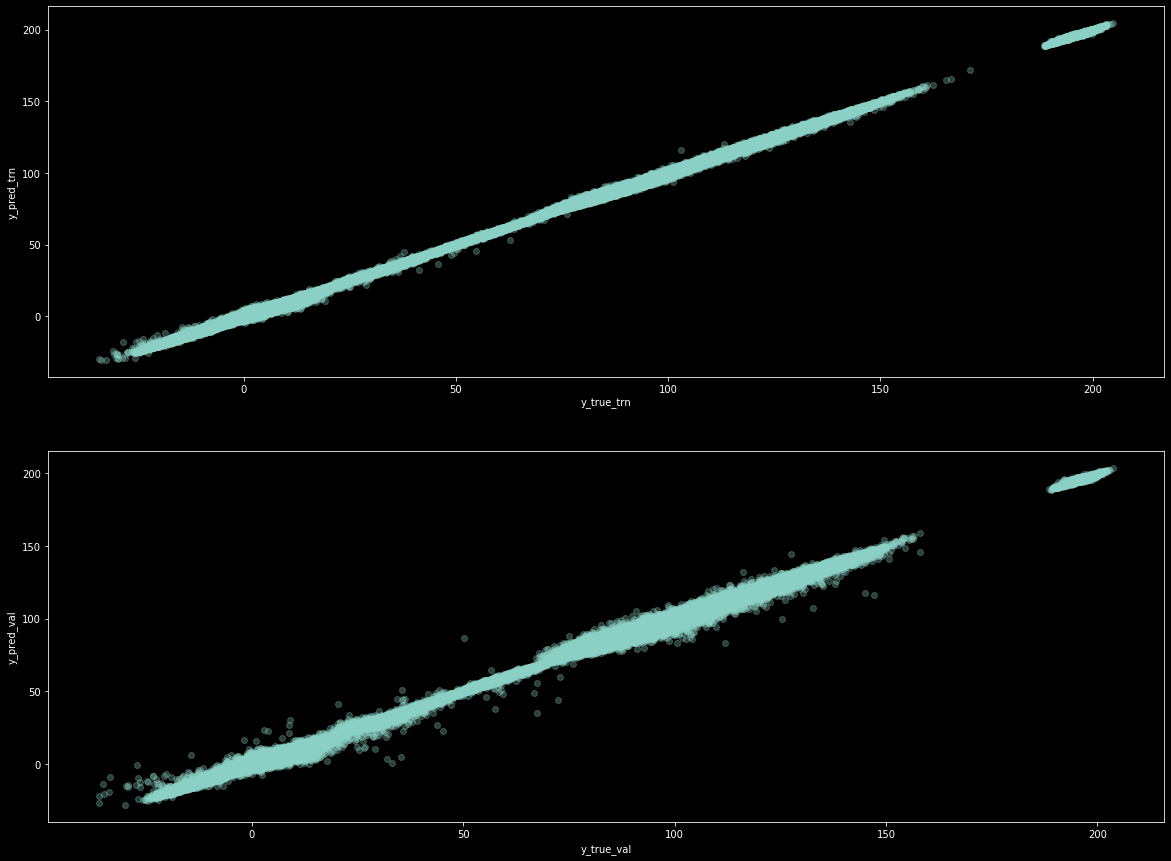

In [45]:
f, axes = plt.subplots(2,1, figsize=(20,15))

ax=axes[0]
ax.scatter(ds_trn['target'], y_pred_trn, alpha=0.3)
ax.set_xlabel('y_true_trn')
ax.set_ylabel('y_pred_trn')


ax=axes[1]
ax.scatter(ds_val['target'], y_pred_val, alpha=0.3)
ax.set_xlabel('y_true_val')
ax.set_ylabel('y_pred_val')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


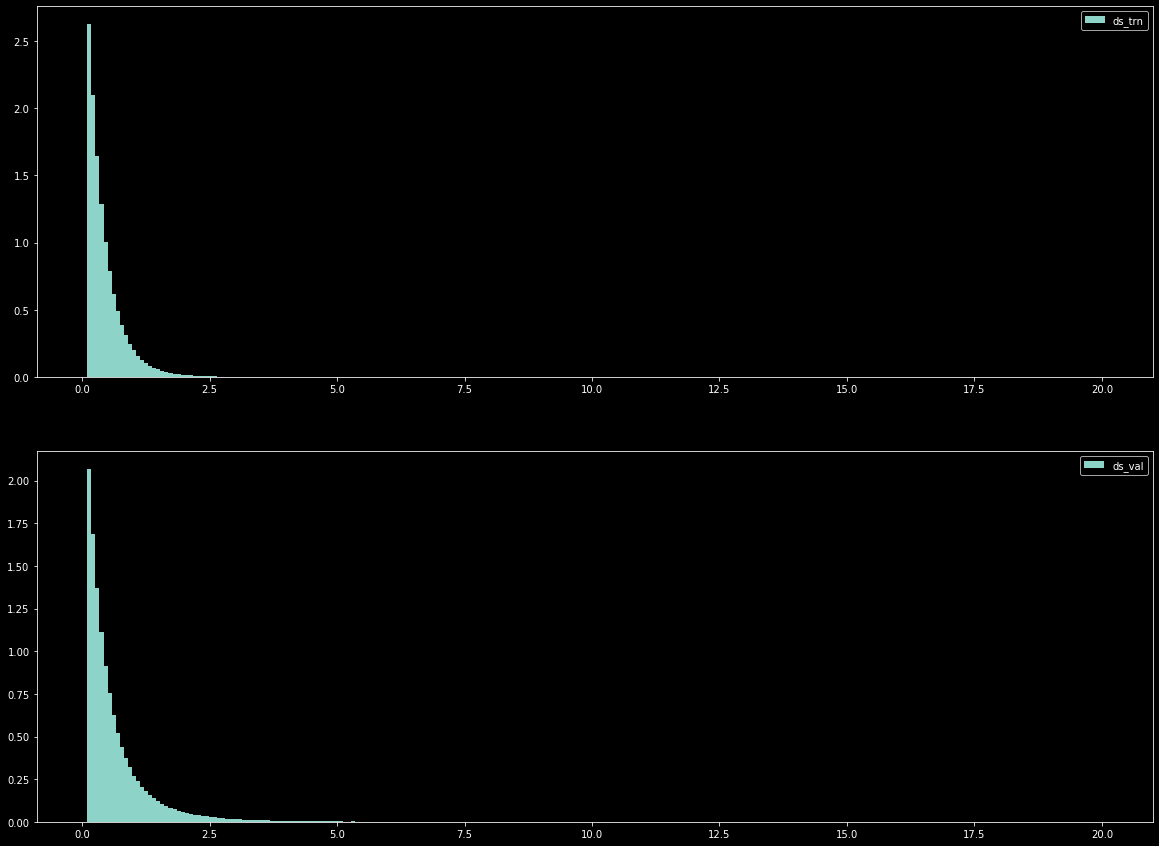

In [46]:
f, axes = plt.subplots(2,1, figsize=(20,15))


ax = axes[0]
ax.hist(np.abs(ds_trn['target'] - y_pred_trn), bins=250, normed=True, range=(0.1,20))
ax.legend(['ds_trn'])


ax = axes[1]
ax.hist(np.abs(ds_val['target'] - y_pred_val), bins=250, normed=True, range=(0.1,20))
ax.legend(['ds_val'])
plt.show()

In [47]:
t3j_features = np.array(['desc_g2ang_00_0', 'desc_g2ang_00_1', 'desc_g2ang_01_0',
                        'desc_g2ang_01_1', 'desc_g2ang_02_0', 'desc_g2ang_02_1',
                        'desc_g2ang_03_0', 'desc_g2ang_03_1', 'desc_g2ang_04_0',
                        'desc_g2ang_04_1', 'desc_g2ang_05_0', 'desc_g2ang_05_1',
                        'desc_g2ang_06_0', 'desc_g2ang_06_1', 'desc_g2ang_07_0',
                        'desc_g2ang_07_1', 'desc_g2ang_08_0', 'desc_g2ang_08_1',
                        'desc_g2ang_09_0', 'desc_g2ang_09_1', 'desc_g2ang_10_0',
                        'desc_g2ang_10_1', 'desc_g2ang_11_0', 'desc_g2ang_11_1',
                        'desc_g2ang_12_0', 'desc_g2ang_12_1', 'desc_g2ang_13_0',
                        'desc_g2ang_13_1', 'desc_g2ang_14_0', 'desc_g2ang_14_1',
                        'desc_g2ang_15_0', 'desc_g2ang_15_1', 'desc_g2ang_16_0',
                        'desc_g2ang_16_1', 'desc_g2ang_17_0', 'desc_g2ang_17_1',
                        'desc_g2ang_18_0', 'desc_g2ang_18_1', 'desc_g2ang_19_0',
                        'desc_g2ang_19_1', 'desc_g2rad_00_0', 'desc_g2rad_00_1',
                        'desc_g2rad_01_0', 'desc_g2rad_01_1', 'desc_g2rad_02_0',
                        'desc_g2rad_02_1', 'desc_g2rad_03_0', 'desc_g2rad_03_1',
                        'desc_g2rad_04_0', 'desc_g2rad_04_1', 'desc_g2rad_05_0',
                        'desc_g2rad_05_1', 'desc_g2rad_06_0', 'desc_g2rad_06_1',
                        'desc_g2rad_07_0', 'desc_g2rad_07_1', 'desc_g2rad_08_0',
                        'desc_g2rad_08_1', 'desc_g2rad_09_0', 'desc_g2rad_09_1',
                        'mulliken_charge_0', 'mulliken_charge_1', 'rel_dist', 'lj_energy',
                        'lj_sum_energy_0', 'lj_sum_energy_1', 'lj_mean_energy_0',
                        'lj_mean_energy_1', 'coulomb_interaction'])

[]

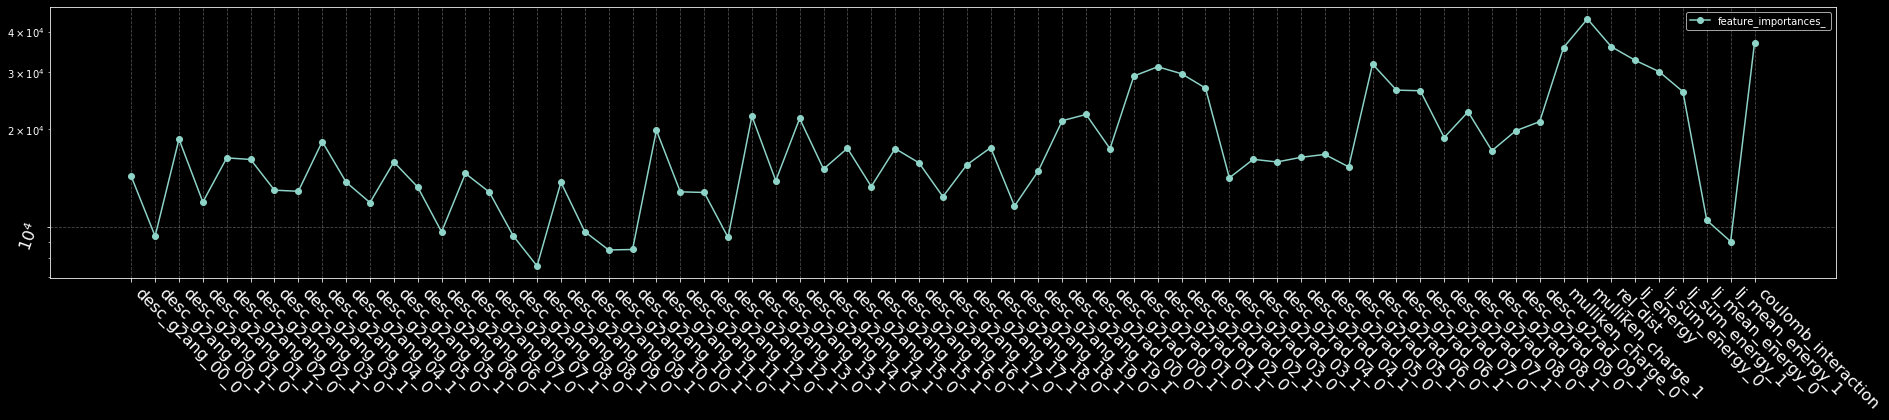

In [48]:
f, axes = plt.subplots(1,1, figsize=(32,5))

ax = axes
ax.plot(t3j_features, lgbm.feature_importances_ , '-o', label='feature_importances_')
ax.tick_params(rotation=70, labelsize=16,)
ax.grid(ls='--', alpha=0.3)
ax.set_yscale("log")

ax.legend()



plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha='left');
plt.plot()